In [1]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
from nltk import tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import wordcloud
from scipy import spatial
import gensim
from gensim import corpora
from sklearn.neighbors import BallTree


In [299]:
import os
import math
fac_keys = list(facilities.keys())
cols = ['Guest_country', 'Room_info', 'Nights_stayed', 'Date of stay', 'Travel_type', 'Review', 'Grade', 'Title', 'Positive']
cols.extend(fac_keys)
print(cols)
all_hotels = pd.DataFrame(columns=cols)
arr = os.listdir('./hotels-with-row-facilities/')
for i in arr:
    if i.endswith('csv'):
        df = pd.read_csv('hotels-with-row-facilities/' + i)
#         print(len(df))
#         l = list(df.columns)
        all_hotels = all_hotels.append(df, ignore_index=True)
    all_hotels.info()
all_hotels.to_csv('all_hotels_row.csv', index=False)


['Guest_country', 'Room_info', 'Nights_stayed', 'Date of stay', 'Travel_type', 'Review', 'Grade', 'Title', 'Positive', 'staff', 'location', 'food/drink', 'dirty', 'bed', 'comfort', 'price', 'bathroom', 'parking', 'restaurant', 'noisiness', 'tv', 'internet', 'fitness', 'covid', 'temperature']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8091 entries, 0 to 8090
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Guest_country  2536 non-null   object 
 1   Room_info      2536 non-null   object 
 2   Nights_stayed  2536 non-null   float64
 3   Date of stay   2536 non-null   object 
 4   Travel_type    2536 non-null   object 
 5   Review         2536 non-null   object 
 6   Grade          2536 non-null   float64
 7   Title          2536 non-null   object 
 8   Positive       2536 non-null   float64
 9   staff          3549 non-null   float64
 10  location       3825 non-null   float64
 11  food/drink     3274 non

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84113 entries, 0 to 84112
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Guest_country  25718 non-null  object 
 1   Room_info      25718 non-null  object 
 2   Nights_stayed  25718 non-null  float64
 3   Date of stay   25718 non-null  object 
 4   Travel_type    25718 non-null  object 
 5   Review         25718 non-null  object 
 6   Grade          25718 non-null  float64
 7   Title          25718 non-null  object 
 8   Positive       25718 non-null  float64
 9   staff          35544 non-null  float64
 10  location       36752 non-null  float64
 11  food/drink     32641 non-null  float64
 12  dirty          30591 non-null  float64
 13  bed            29939 non-null  float64
 14  comfort        30575 non-null  float64
 15  price          28971 non-null  float64
 16  bathroom       29195 non-null  float64
 17  parking        26562 non-null  float64
 18  restau

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128222 entries, 0 to 128221
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Guest_country  39313 non-null  object 
 1   Room_info      39313 non-null  object 
 2   Nights_stayed  39313 non-null  float64
 3   Date of stay   39313 non-null  object 
 4   Travel_type    39313 non-null  object 
 5   Review         39313 non-null  object 
 6   Grade          39313 non-null  float64
 7   Title          39313 non-null  object 
 8   Positive       39313 non-null  float64
 9   staff          53926 non-null  float64
 10  location       56506 non-null  float64
 11  food/drink     50223 non-null  float64
 12  dirty          46149 non-null  float64
 13  bed            46105 non-null  float64
 14  comfort        46991 non-null  float64
 15  price          44437 non-null  float64
 16  bathroom       44210 non-null  float64
 17  parking        40624 non-null  float64
 18  rest

In [83]:
facilities = dict()

facilities['staff'] = ['staff', 'service', 'polite', 'rude', 'helpful', 'friendly', 'employee', 'reception']
facilities['location'] = ['view', 'location', 'place', 'victoria', 'sighting', 'airport', 'area', 'central', 'centre',
                          'city', 'near']
facilities['food/drink'] = ['meal', 'breakfast', 'lunch', 'brunch', 'dinner', 'plate', 'dish', 'hungry', 'food', 'drink', 'soda', 'coffee', 'tea']
facilities['dirty'] = ['clean', 'dirty', 'filthy', 'dust', 'cleanliness']
facilities['bed'] = ['bed', 'sheet', 'pillow', 'mattress', 'sleep']
facilities['comfort'] = ['comfort', 'comfortable', 'comfy', 'decor', 'modern', '']
facilities['price'] = ['price', 'expensive', 'cheap', 'money', 'pricey', 'paid']
facilities['bathroom'] = ['towel', 'shower', 'toilet', 'bath', 'water', 'bath', 'bathroom']
facilities['parking'] = ['car', 'parking']
facilities['restaurant'] = ['restaurant', 'menu', 'bar']
facilities['noisiness'] = ['loud', 'quiet', 'noisy', 'noise', 'sound', 'quiet']
facilities['tv'] = ['television', 'tv', 'screen', 'programm']
facilities['internet'] = ['wifi', 'signal', 'download', 'network', 'internet']
facilities['fitness'] = ['gym', 'fitness', 'spa', 'workout', 'pool']
facilities['covid'] = ['covid', 'covid19', 'virus']
facilities['temperature'] = ['air', 'conditioning', 'heating', 'temperature']

# facilities['heating'] = ['air', 'service', 'polite', 'rude', 'helpfull', 'friendly']


TypeError: can only concatenate str (not "float") to str

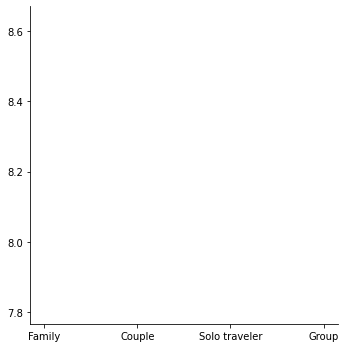

In [13]:

sns.lmplot(data=all_hotels, x="Travel_type", y="Grade", x_jitter=.5)

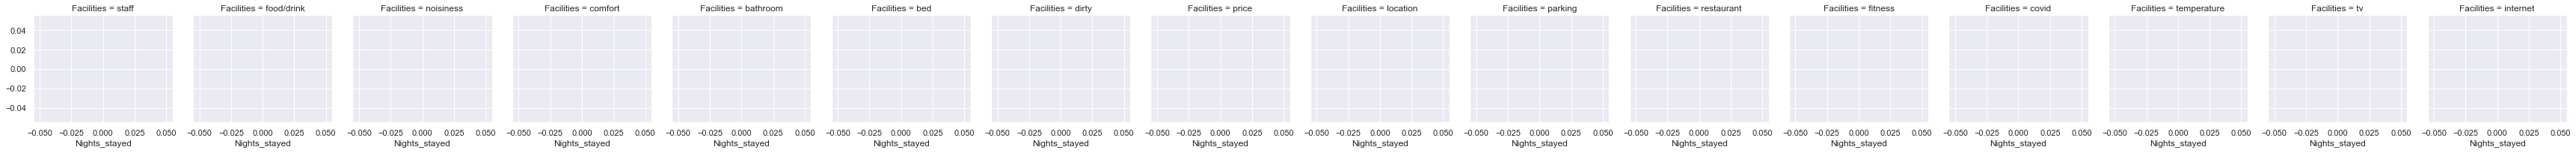

In [68]:
g = sns.FacetGrid(all_hotels, col="Facilities", hue="Positive")
g.map(sns.scatterplot, "Nights_stayed")

In [298]:
all_hotels = pd.read_csv("all_hotels_row.csv")
all_hotels.tail()

,Guest_country,Room_info,Nights_stayed,Date of stay,Travel_type,Review,Grade,Title,Positive,staff,...,price,bathroom,parking,restaurant,noisiness,tv,internet,fitness,covid,temperature
57204,United Kingdom,Superior Double Room,1.0,August 2018,Couple,The only small thing was an issue with our TV...,10.0,Wonderful clean and bright stay,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
57206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57207,United Kingdom,Executive Double Room,1.0,July 2018,Family,Bedroom looks a little basic.,10.0,Exceptional,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [279]:
all_hotels["Date of stay"] = all_hotels['Date of stay'].str[:-5]
all_hotels

,Guest_country,Room_info,Nights_stayed,Date of stay,Travel_type,Review,Grade,Title,Positive,Facilities
0,France,Superior King Room,4,August,Family,"Everything was amazing: the staff, the room, ...",10.0,Exceptional,1,staff
1,France,Superior King Room,4,August,Family,"Everything was amazing: the staff, the room, ...",10.0,Exceptional,1,food/drink
2,United Kingdom,Superior King Room,1,March,Couple,The staff were pleasant and the room was perf...,10.0,Great location and place to stay,1,staff
3,United Kingdom,Superior King Room,1,March,Couple,The staff were pleasant and the room was perf...,10.0,Great location and place to stay,1,noisiness
4,United Kingdom,Superior King Room,1,March,Couple,The staff were pleasant and the room was perf...,10.0,Great location and place to stay,1,comfort
...,...,...,...,...,...,...,...,...,...,...
109303,Belgium,Superior Twin Room,1,August,Group,I also work at the reception in the Radisson ...,6.7,Good but not great,0,bathroom
109304,Belgium,Superior Twin Room,1,August,Group,I also work at the reception in the Radisson ...,6.7,Good but not great,0,dirty
109305,United Kingdom,Superior Double Room,1,July,Family,The room had no tea/coffee equipment I.e. Cup...,6.7,Loved the architecture and the live jazz in th...,0,food/drink
109306,United Kingdom,Superior Double Room,1,July,Family,The room had no tea/coffee equipment I.e. Cup...,6.7,Loved the architecture and the live jazz in th...,0,bathroom


In [187]:
all_hotels["Date of stay"] = pd.to_datetime(all_hotels['Date of stay'])
all_hotels = all_hotels.sort_values(by="Date of stay")
all_hotels

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1-08-01 00:00:00

In [280]:
l = all_hotels['Travel_type'].factorize()
all_hotels['Travel_type'] = l[0]
# # all_hotels['Travel_type'].cat.codes
# # all_hotels.head()
l

(array([0, 0, 1, ..., 0, 0, 0]),
 Index(['Family', 'Couple', 'Solo traveler', 'Group'], dtype='object'))

In [281]:
l = all_hotels['Date of stay'].factorize()
all_hotels['Date of stay'] = l[0]
# # all_hotels['Travel_type'].cat.codes
# # all_hotels.head()
l

(array([0, 0, 1, ..., 8, 8, 8]),
 Index(['August', 'March', 'January', 'February', 'November', 'December',
        'October', 'September', 'July', 'April', 'June', 'May'],
       dtype='object'))

In [208]:
all_hotels = all_hotels.loc[(all_hotels['Facilities'] == 'fitness') | (all_hotels['Facilities'] ==  'food/drink') |( all_hotels['Facilities'] ==  'location')]
all_hotels

,Guest_country,Room_info,Nights_stayed,Date of stay,Travel_type,Review,Grade,Title,Positive,Facilities
1,France,Superior King Room,4,August,Family,"Everything was amazing: the staff, the room, ...",10.0,Exceptional,1,food/drink
13,United Kingdom,Superior King Room,3,January,Solo traveler,Luxurious room and bathroom; Modern and clea...,10.0,Exceptional,1,location
17,United Kingdom,Superior King Room,3,January,Solo traveler,Luxurious room and bathroom; Modern and clea...,10.0,Exceptional,1,food/drink
25,United Kingdom,King Studio,2,February,Solo traveler,"Really like the breakfast, the selection was ...",7.0,Pleasant,1,food/drink
28,United Kingdom,King Studio,1,January,Couple,Stayed here 1 night\nAs you walk into the hot...,8.0,Pleasant stay in a big trendy room,1,location
...,...,...,...,...,...,...,...,...,...,...
109288,United Kingdom,Executive Double Room,2,August,Couple,Executive Room to rear not clear on booking ...,5.0,Disappointing,0,food/drink
109293,United Arab Emirates,Superior Double Room,3,August,Family,"very small rooms, no view and even at the tim...",6.2,Pleasant,0,location
109298,United Kingdom,Superior Double Room,3,August,Couple,"Swimming pool not available,and the smell fro...",6.7,Pleasant,0,fitness
109301,Belgium,Superior Twin Room,1,August,Group,I also work at the reception in the Radisson ...,6.7,Good but not great,0,food/drink


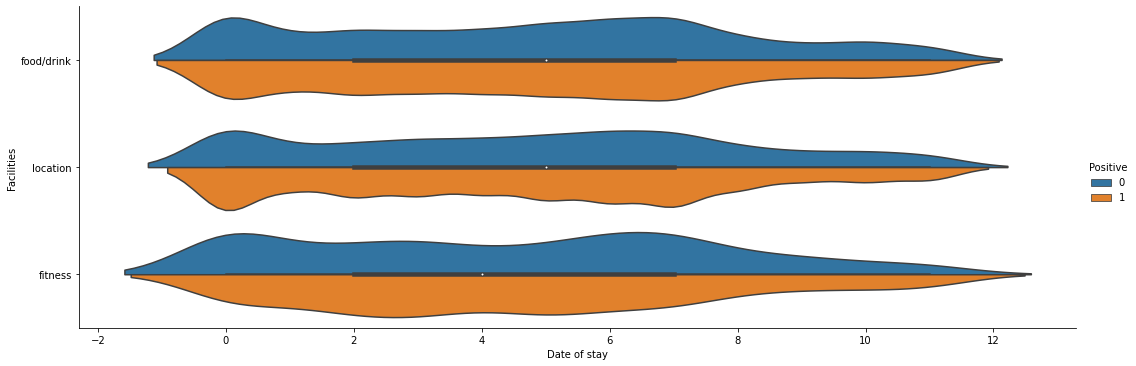

In [203]:
# sns.catplot(x="Travel_type", y="Nights_stayed",hue="food/drink", kind='violin', data=all_hotels, aspect=15/8)
sns.catplot(x = "Date of stay", y = "Facilities", kind = 'violin', hue="Positive",split="True",data = all_hotels, aspect=12/4);
plt.show()

/home/behemoth/anaconda3/envs/insurance-faq-engine-february-2021-tim2/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


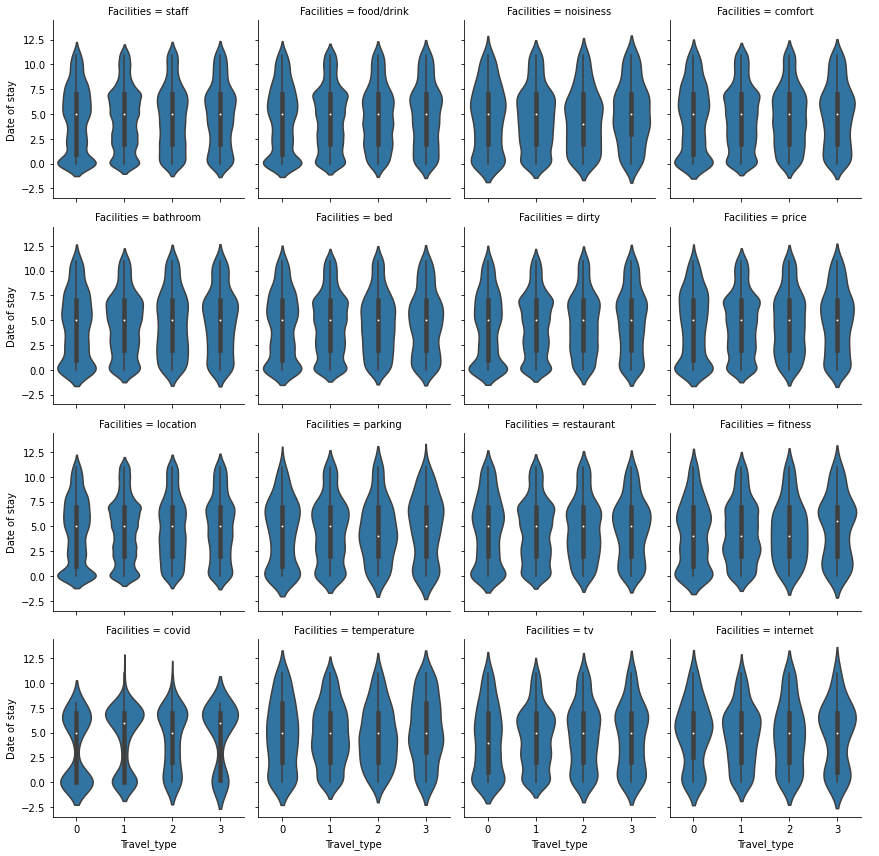

In [283]:
# families most frequent in August
g = sns.FacetGrid(all_hotels, col="Facilities", col_wrap=4)
g.map(sns.violinplot, "Travel_type","Date of stay", data=all_hotels)
g.add_legend()
# sns.catplot(x="Date of stay", col="Nights_stayed", hue="Travel_type", kind="count", palette="ch:.25", data=all_hotels, aspect=10/5)

In [ ]:
sns.catplot(x="Date of stay", hue="Facilities", kind="count", palette="ch:.25", data=all_hotels, aspect=10/5)

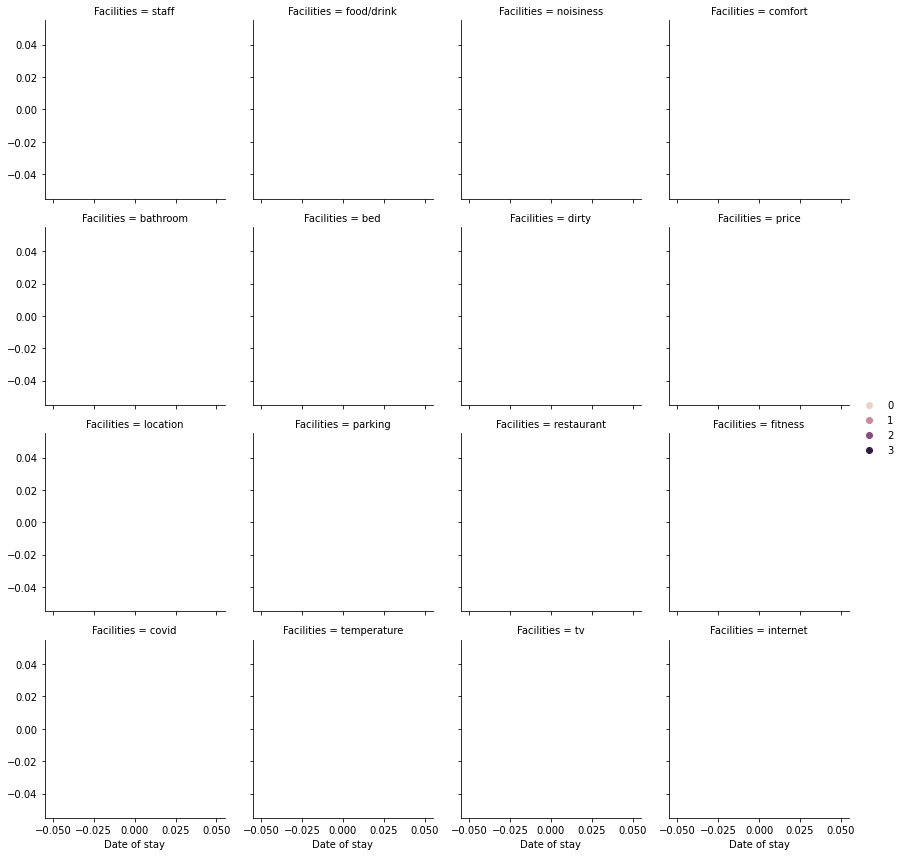

In [297]:
g = sns.FacetGrid(all_hotels, col="Facilities", col_wrap=4)
g.map(sns.histplot,"Date of stay", hue="Travel_type",multiple="stack", stat="frequency",data=all_hotels)
g.add_legend()
# show percentage of 